# 该方法计算小波场的强度（intensity scale）相关的统计量

In [1]:
import sys
sys.path.append('../')
from intenisty_scale.lib.make_spatialVx import make_spatialVx
from intenisty_scale.wave_is_spatial_vx import wave_is_spatial_vx
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt # for data visualization

## wave_is 相关方法共两个， 由输入参数的不同决定具体使用的方法


<font face="黑体" color=Blue size=3>**wave_is_default(grd_ob, grd_fo, th, j=None, levels=None, rule=">=", verbose=False)**</font>
                             
<font face="黑体" color=Blue size=3>**wave_is_spatial_vx(input_object, th=None, j=None, levels=None, rule=">=", verbose=False, time_point=1, obs=1, model=1)**</font>   
  
|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=Blue size=5>grd_ob</font>**| 二维矩阵形式的网格观测场 | 
|**<font face="黑体" color=Blue size=5>grd_fo</font>**| 二维矩阵形式的网格预报场 |  
|**<font face="黑体" color=Blue size=5>input_object</font>**| make_spatialVx的结果, 使用该方法相当于从make_spatialVx的结果中，根据time_point，obs， model 获取对应的观测场预报场，并调用waverify2d_default | 
|*th*| thresholds, 类型为字典，key必须包含 “X”, “Xhat”，value 为数组， 表示观测场和预报场对应的阈值，wave_is_default为必填属性，wave_is_spatial_vx为可选属性， 改为从input_object中获取 |
|*j*| int类型， 代表小波层数，，如果缺省则根据场是否为二值的（dyadic）计算， 如果为二值（输入场的两个维度方向的log2值均为整数）则为log2(min(dim(X)))， 否则设为4， 详细说明见pywt包|
|*levels*| 数组，其中元素为数字， 代表平滑参数, 此处仅存储用，不参与实际计算，画图时作为x轴展示|
|*rule*| 字符串，代表threshold的规则，可选值为 >=, >, <, <=|
|*verbose*| 布尔值，是否打印日志 | 
|**time_point**| 整数，代表分析的时间序号 |  
|**obs**| 整数，代表分析的观测场序号 |  
|**model**| 整数，代表分析的预报场序号 |  


**调用示例**

In [2]:
## 此处使用wave_is_spatial_vx方法
obs = pyreadr.read_r('./data/UKobs6.Rdata')['UKobs6']
fcst = pyreadr.read_r('./data/UKfcst6.Rdata')['UKfcst6']
loc = pyreadr.read_r('./data/UKloc.Rdata')['UKloc']
hold = make_spatialVx(obs, fcst, loc, fieldtype="Rainfall", units="mm/h", dataname="Nimrod",
                          obsname="UKobs6", modelname="UKfcst6", thresholds=[0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50])

<font face="黑体" color=green size=4>**返回结果内容说明**</font> 

m记为levels， n记为thresholds的个数

|一级关键词|说明|
|:--|:--|
|**<font face="黑体" color=green size=3>j</font>**| 小波层数， 继承自参数j |
|**<font face="黑体" color=green size=3>en_vx</font>**| 观测场小波场能量， m x n矩阵 |
|**<font face="黑体" color=green size=3>en_fcst</font>**| 预报场的小波场能量，m x n矩阵 |
|**<font face="黑体" color=green size=3>mse</font>**| 观测场预报场的均方误差（MSE）， m x n矩阵 |
|**<font face="黑体" color=green size=3>ss</font>**| 观测场预报场的评分（skill score）， m x n矩阵 |
|**<font face="黑体" color=green size=3>bias</font>**| 观测场预报场的偏差（bias）， 1 x n矩阵|
|**<font face="黑体" color=green size=3>mse_random</font>**| 1 x n矩阵 |
|**<font face="黑体" color=green size=3>attributes</font>**| 字典， 继承自输入参数的所有属性 |


In [3]:
look = wave_is_spatial_vx(hold, j=8, levels=np.power(2, np.arange(7, -1, -1)))

In [4]:
x_axis = look["attributes"]["thresholds"]["X"]
y_axis = look["attributes"]["levels"]

### 部分结果图示

In [5]:
sns.heatmap(pd.DataFrame(look["mse"], columns = x_axis, index = y_axis), 
                annot=True, xticklabels= True, yticklabels= True)
plt.title("mse")
plt.show()

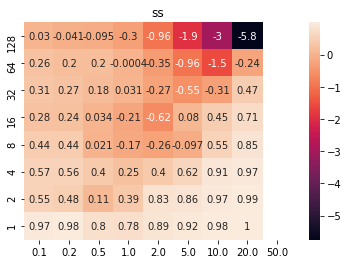

In [6]:
sns.heatmap(pd.DataFrame(look["ss"], columns = x_axis, index = y_axis), 
                annot=True, xticklabels= True, yticklabels= True)
plt.title("ss")
plt.show()

In [7]:
sns.heatmap(pd.DataFrame(look["en_vx"], columns = x_axis, index = y_axis), 
                annot=True, xticklabels= True, yticklabels= True)
plt.title("en_vx")
plt.show()

### 参考文献:

Casati, B., Ross, G. and Stephenson, D. B. (2004) A new intensity-scale approach for the verification of spatial precipitation forecasts. Meteorol. Appl. 11, 141–154.
        
Casati, B. (2010) New Developments of the Intensity-Scale Technique within the Spatial Verification Methods Inter-Comparison Project. Wea. Forecasting 25, (1), 113–143, doi:10.1175/2009WAF2222257.1.
